Individuals' Amount:2

Individual 1
Archive: 2.rit
Color: red

Individual 2
Archive: 16.let
Color: blue


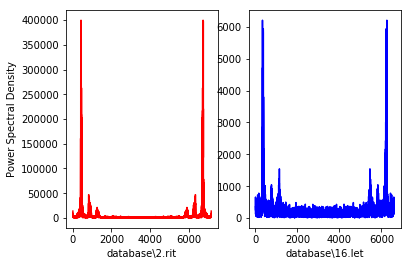

In [3]:
import matplotlib.pyplot as mpl
import numpy as np

class Plotter:
    def __init__(self,archive,amount,index,color,bool_label):
        color = color if color != "" else "black"
        archive = open(archive,"r")
        for line in archive:
            #all archive's data are readed in 1st line, separated by semicolon
            readed_line = line.split(";")
            if readed_line[-1].isdigit() == False:
                del readed_line[-1]
        data_list = [float(data) for data in readed_line]
        fft = np.fft.fftpack.fft(data_list)
        powerspectraldensity_list = np.abs(fft)
        powerspectraldensity_list = list(powerspectraldensity_list)
        #avoiding processment errors, we delete the 1st value from P.S.D.
        del powerspectraldensity_list[0]
        x_array = [n for n in range(len(powerspectraldensity_list))]
        table = amount/2
        #plot
        mpl.subplot( table, 2 , index )
        mpl.plot(  x_array  ,  powerspectraldensity_list  ,  color=color)
        if bool_label == True: mpl.ylabel("Power Spectral Density")
        mpl.xlabel(archive.name)

amount = int(input("Individuals' Amount:"))
for index in range(amount):
    index+=1
    print('\nIndividual',index)
    archive = input('Archive: ')
    color =  input('Color: ')
    if index == 1:
        Plotter('database\\'+archive, amount, index, color, True)
    else:
        Plotter('database\\'+archive, amount, index, color, False)
mpl.show()